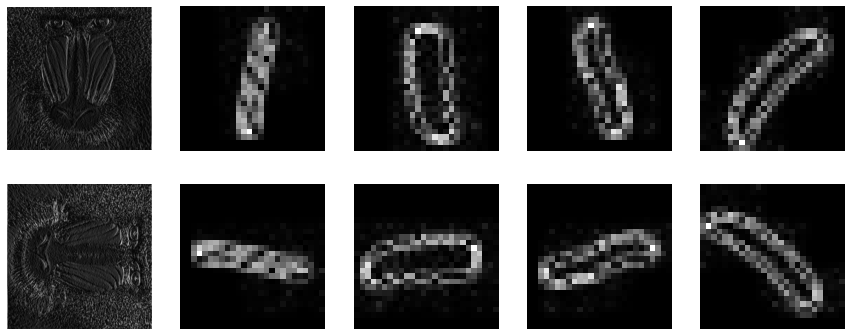

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#컨볼루션 계산 함수
def convolution(img,kern):
    y1, x1 = img.shape
    y2, x2 = kern.shape
    y3 = y1-y2+1
    x3 = x1-x2+1
    con_img = []
    for i in range(0,y3): 
        for j in range(0,x3): 
            con_img.append((img[i:i+y2,j:j+x2]*kern).sum())
    con_img = np.array(con_img).reshape(y3,x3)    
    return con_img

#색 변화가 없는 부분을 검은색 변화가 있는부분을 흰색으로 나타내어 외곽선만 흰색 나머지를 검은색으로 보여주기위한 함수
def blackwhite(img):
    y, x = img.shape
    for i in range(0,y):
        for j in range(0,x):
            if img[i,j]<0:
                img[i,j]*=-1                
    return img

#이미지 전부 로드
img = cv2.imread('baboon.jpg',cv2.IMREAD_GRAYSCALE)
img0 = cv2.imread('imag0.jpg',cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('imag1.jpg',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('imag2.jpg',cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('imag3.jpg',cv2.IMREAD_GRAYSCALE)

#이미지 90도 시계방향회전시켜 로드
ro_img = cv2.rotate(cv2.imread('baboon.jpg',cv2.IMREAD_GRAYSCALE), cv2.ROTATE_90_CLOCKWISE)
ro_img0 = cv2.rotate(cv2.imread('imag0.jpg',cv2.IMREAD_GRAYSCALE), cv2.ROTATE_90_CLOCKWISE)
ro_img1 = cv2.rotate(cv2.imread('imag1.jpg',cv2.IMREAD_GRAYSCALE), cv2.ROTATE_90_CLOCKWISE)
ro_img2 = cv2.rotate(cv2.imread('imag2.jpg',cv2.IMREAD_GRAYSCALE), cv2.ROTATE_90_CLOCKWISE)
ro_img3 = cv2.rotate(cv2.imread('imag3.jpg',cv2.IMREAD_GRAYSCALE), cv2.ROTATE_90_CLOCKWISE)

#순서: 필터크기,시그마,세타,람다,감마,프시
#세타값 np.pi/x 에서 x값이 커질수록 엣지검출이 실패하여 np.pi에서 적당한걸 확인하였음
#람다의 경우도 np.pi보다 크거나 작앚질경우 엣지검출에 좋지 않음을 확인.
#감마와 프시는 1로 고정해주었다.
gabor_kern = cv2.getGaborKernel((3,3), 10*np.pi, np.pi, np.pi, 1, 1, ktype = cv2.CV_32F)

#MNIST digit '1' 이미지를 edge detection을 하기위해 직접 필터값을 이것저것 테스트해본 결과 찾은 값
kern = np.array([[1, 1, 1], [1, -2.5*np.pi, 1], [1, 1, 1]])

#이미지와 필터을 convolution
con_img=convolution(img,gabor_kern)
con_img0=convolution(img0,kern)
con_img1=convolution(img1,kern)
con_img2=convolution(img2,kern)
con_img3=convolution(img3,kern)
con_ro_img=convolution(ro_img,gabor_kern)
con_ro_img0=convolution(ro_img0,kern)
con_ro_img1=convolution(ro_img1,kern)
con_ro_img2=convolution(ro_img2,kern)
con_ro_img3=convolution(ro_img3,kern)

#convolution한 이미지들을 외곽선만 흰색으로 나머지는 검은색으로 나오게 해줌으로 마무리
result=blackwhite(con_img)
result0=blackwhite(con_img0)
result1=blackwhite(con_img1)
result2=blackwhite(con_img2)
result3=blackwhite(con_img3)
ro_result=blackwhite(con_ro_img)
ro_result0=blackwhite(con_ro_img0)
ro_result1=blackwhite(con_ro_img1)
ro_result2=blackwhite(con_ro_img2)
ro_result3=blackwhite(con_ro_img3)

plt.figure(figsize=(15,6))
plt.subplot(251)
plt.axis('off')
plt.imshow(result,cmap='gray')
plt.subplot(252)
plt.axis('off')
plt.imshow(result0, cmap='gray')
plt.subplot(253)
plt.axis('off')
plt.imshow(result1, cmap='gray')
plt.subplot(254)
plt.axis('off')
plt.imshow(result2, cmap='gray')
plt.subplot(255)
plt.axis('off')
plt.imshow(result3, cmap='gray')
plt.subplot(256)
plt.axis('off')
plt.imshow(ro_result,cmap='gray')
plt.subplot(257)
plt.axis('off')
plt.imshow(ro_result0, cmap='gray')
plt.subplot(258)
plt.axis('off')
plt.imshow(ro_result1, cmap='gray')
plt.subplot(259)
plt.axis('off')
plt.imshow(ro_result2, cmap='gray')
plt.subplot(2,5,10)
plt.axis('off')
plt.imshow(ro_result3, cmap='gray')
plt.show()